# TRX price prediction

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('TRX-USD.csv')

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,0.013294,0.013388,0.013193,0.013250,0.013250,977215885
1,2020-01-02,0.013254,0.013254,0.012809,0.012870,0.012870,999867628
2,2020-01-03,0.012887,0.013524,0.012772,0.013435,0.013435,1109470187
3,2020-01-04,0.013450,0.013534,0.013310,0.013521,0.013521,991868126
4,2020-01-05,0.013531,0.013913,0.013522,0.013623,0.013623,1079591214


### Adding features

In [4]:
year = []
month=[]
day=[]
for i in data['Date'].values:
    x = i.split('-')
    year.append(int(x[0]))
    month.append(int(x[1]))
    day.append(int(x[2]))
data['Year'] = year
data['Month'] = month
data['Day'] = day

In [5]:
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
351,2020-12-17,0.031191,0.032363,0.030486,0.030708,0.030708,1226706409,2020,12,17
644,2021-10-06,0.096220,0.096971,0.091276,0.095521,0.095521,1713306308,2021,10,6
1087,2022-12-23,0.055554,0.055676,0.054190,0.054236,0.054236,149471811,2022,12,23
854,2022-05-04,0.072351,0.086252,0.070226,0.086249,0.086249,2980152527,2022,5,4
125,2020-05-05,0.016307,0.016627,0.015797,0.015902,0.015902,1797335086,2020,5,5


In [6]:
data['Date']=pd.to_datetime(data['Date'])

In [7]:
# prev_score give us the difference between the highest price and the lowest price
data['Prev_close'] = data['Close'].shift(1)
data.dropna(axis=0,inplace=True)
# delta_hl give us the difference between the highest and the actual close
data['delta_hl'] = data['High'] - data['Low']

In [8]:
train = data[data['Date'] <= pd.datetime(2022,12,31,23,59)]
test = data[data['Date'] >= pd.datetime(2022,12,31,23,59)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_16124\1666691955.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  train = data[data['Date'] <= pd.datetime(2022,12,31,23,59)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_16124\1666691955.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test = data[data['Date'] >= pd.datetime(2022,12,31,23,59)]


### Visualisation

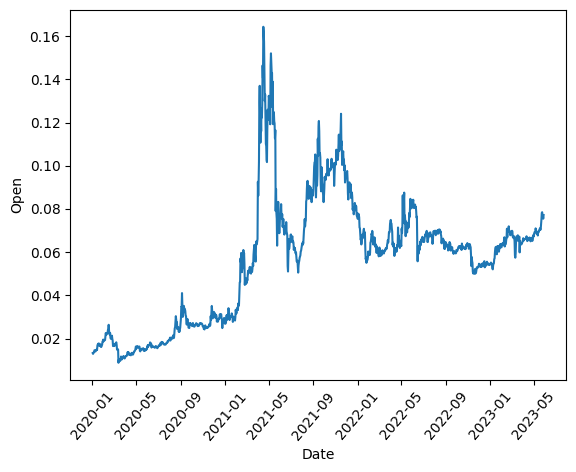

In [9]:
sns.lineplot(data,x='Date',y='Open')
plt.xticks(rotation = 50)
plt.show()      

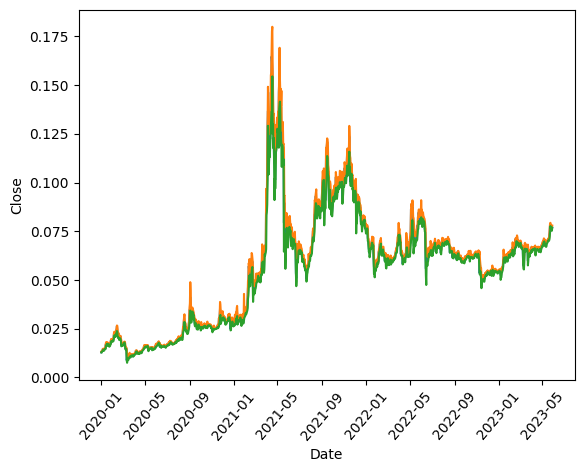

In [10]:
sns.lineplot(data,x='Date',y='Close')
sns.lineplot(data,x='Date',y='High')
sns.lineplot(data,x='Date',y='Low')
plt.xticks(rotation = 50)
plt.show()      

In [11]:
true_test = test['Close']

In [12]:
train.drop('Date',axis=1,inplace=True)
test.drop('Date',axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16124\565370736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Date',axis=1,inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16124\565370736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Date',axis=1,inplace=True)


### Model

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

In [14]:
y=train['Close']
x=train.drop('Close',axis=1,inplace=False)
train_X, test_X, train_y, test_y = train_test_split(x, y,test_size = 0.3, random_state = 40)
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(train_X, train_y)
pred = xgb_r.predict(test_X)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
print("R squared: ", metrics.r2_score(test_y,pred))

RMSE :  0.013366
R squared:  0.8176439292708289


In [15]:
tst = test.drop('Close',axis=1,inplace=False)
tst=tst.to_numpy()

In [16]:
pred=xgb_r.predict(tst)
rmse = np.sqrt(MSE(true_test, pred))
print("RMSE : % f" %(rmse))
print("R squared: ", metrics.r2_score(true_test,pred)) 

RMSE :  0.012659
R squared:  -5.323253599891553


### Optimisation

In [17]:
def accuracy(k):    
    train_X, test_X, train_y, test_y = train_test_split(x, y,test_size = 0.3, random_state = k)
    xgb_r = xgb.XGBRegressor(objective ='reg:tweedie',n_estimators = 40, seed = 0)
    xgb_r.fit(train_X, train_y)
    pred = xgb_r.predict(test_X)
    rmse = np.sqrt(MSE(test_y, pred))
    return rmse
def best_rd(x):
    d=[]
    for i in range(0,x+1):
        d.append(accuracy(i))
    return d
c =best_rd(200)
m=c.index(min(c))
m

94

In [18]:
def accuracy(k):    
    train_X, test_X, train_y, test_y = train_test_split(x, y,test_size = 0.3, random_state = 94)
    xgb_r = xgb.XGBRegressor(objective ='reg:tweedie',n_estimators = k, seed = 0)
    xgb_r.fit(train_X, train_y)
    pred = xgb_r.predict(test_X)
    rmse = np.sqrt(MSE(test_y, pred))
    return rmse
def best_rd(x):
    d=[]
    for i in range(0,x+1):
        d.append(accuracy(i))
    return d
c =best_rd(100)
m=c.index(min(c))
m

97

### Score and Evaluation

In [19]:
y=train['Close']
x=train.drop('Close',axis=1,inplace=False)
train_X, test_X, train_y, test_y = train_test_split(x, y,test_size = 0.3, random_state = 94)
xgb_r = xgb.XGBRegressor(objective ='reg:tweedie',n_estimators = 97, seed = 0)
xgb_r.fit(train_X, train_y)
pred = xgb_r.predict(test_X)
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))
print("R squared: ", metrics.r2_score(test_y,pred))

RMSE :  0.000602
R squared:  0.9995666119958929


In [20]:
pred=xgb_r.predict(tst)
rmse = np.sqrt(MSE(true_test, pred))
print("RMSE : % f" %(rmse))
print("R squared: ", metrics.r2_score(true_test,pred)) 

RMSE :  0.000484
R squared:  0.9907716499679935


In [21]:
comparaison = pd.DataFrame()
x = true_test.values

In [22]:
comparaison['Predictions'] = pred
comparaison['True_test'] = x

In [23]:
comparaison

,Predictions,True_test
0,0.055358,0.054820
1,0.055197,0.055157
2,0.054763,0.054833
3,0.054754,0.054732
4,0.053320,0.053661
...,...,...
143,0.077920,0.076898
144,0.077494,0.076813
145,0.074319,0.075489
146,0.077477,0.077189


<Axes: xlabel='Predictions', ylabel='True_test'>

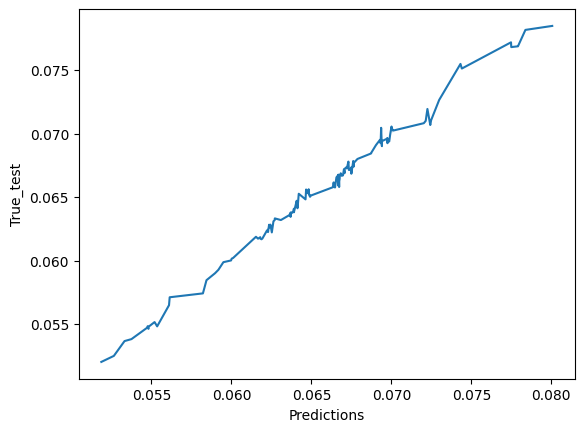

In [24]:
sns.lineplot(comparaison,x='Predictions',y='True_test')

In [25]:
import pickle
with open('trx_regressor','wb') as f:
    pickle.dump(xgb_r,f)